Questions 1 - 5 already answered in data mining - take home Midterm part 1 - Abi - CS482-104 file as PDF attached in Files Section.

Question 6 will be answered below using Binary Classification Method.

Using dataset to train logistic regressor that will predict target variable y

In [269]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 12)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)
df = pd.read_csv("/content/CBC_data.csv")
df = df.dropna()
print(df.shape)
print(list(df.columns))
df.head()

(2994, 15)
['ID', 'SEX', 'TYPEAREA', 'SEX.REPRO', 'REPRO.STATUS', 'AGE', 'PARASITE_STATUS', 'RBC', 'HGB', 'WBC', 'EOS.CNT', 'MONO.CNT', 'NUT.CNT', 'PL.CNT', 'LYMP.CNT']


,ID,SEX,TYPEAREA,SEX.REPRO,REPRO.STATUS,AGE,PARASITE_STATUS,RBC,HGB,WBC,EOS.CNT,MONO.CNT,NUT.CNT,PL.CNT,LYMP.CNT
0,grls5ZUT2BYY,Male,Suburban,IntactMale,Intact,9,Negative,6.4,16.6,14.2,142.0,852.0,6390.0,210.0,6816.0
1,grls8DCONYUU,Female,Rural,NeuteredFemale,Neutered,6,Negative,4.8,12.5,10.0,400.0,300.0,4800.0,209.0,4500.0
2,grlsUC5R4PTT,Male,Suburban,IntactMale,Intact,14,Negative,6.2,17.3,9.5,190.0,475.0,7315.0,164.0,1520.0
3,grlsXUR2PY88,Male,Rural,IntactMale,Intact,6,Negative,5.4,13.8,14.1,1692.0,423.0,7755.0,254.0,4230.0
4,grlsTBZUF3GG,Female,Rural,IntactFemale,Intact,18,Negative,5.9,14.4,6.5,390.0,130.0,2795.0,213.0,3185.0


In [270]:
df['PARASITE_STATUS'].unique()

array(['Negative', 'Positive'], dtype=object)

In [271]:
df['PARASITE_STATUS'].value_counts()

Negative    2787
Positive     207
Name: PARASITE_STATUS, dtype: int64

In [293]:
count_negativeParasite = len(df[df['PARASITE_STATUS']=="Negative"])
count_positiveParasite = len(df[df['PARASITE_STATUS']=="Positive"])
percentageofNegativeParasite = count_negativeParasite / (count_negativeParasite + count_positiveParasite)
print("Percentage of Parasite Status as Negative is : ", percentageofNegativeParasite * 100)
percentageofPositiveParasite = count_positiveParasite / (count_negativeParasite + count_positiveParasite)
print("Percentage of Parasite Status as Positive is : ", percentageofPositiveParasite * 100)

Percentage of Parasite Status as Negative is :  93.08617234468937
Percentage of Parasite Status as Positive is :  6.913827655310621


In [294]:
df.groupby('PARASITE_STATUS').mean()

,AGE,RBC,HGB,WBC,EOS.CNT,MONO.CNT,NUT.CNT,PL.CNT,LYMP.CNT,ID_grls007MPNZZ,...,LYMP.CNT_7097.0,LYMP.CNT_7168.0,LYMP.CNT_7203.0,LYMP.CNT_7370.0,LYMP.CNT_7500.0,LYMP.CNT_7849.0,LYMP.CNT_8018.0,LYMP.CNT_8036.0,LYMP.CNT_8208.0,LYMP.CNT_9548.0
PARASITE_STATUS,,,,,,,,,,,,,,,,,,,,,
Negative,14.322928,6.409476,15.636634,9.673448,295.381055,472.726947,5537.256548,232.757086,3352.902045,0.000359,...,0.000359,0.000000,0.000000,0.000359,0.000359,0.000000,0.000359,0.000359,0.000359,0.000359
Positive,13.144928,6.233237,15.189372,10.612077,350.135266,534.077295,6260.516908,256.685990,3451.111111,0.000000,...,0.000000,0.004831,0.004831,0.000000,0.000000,0.004831,0.000000,0.000000,0.000000,0.000000


In [295]:
df.groupby('PL.CNT').mean()

,AGE,RBC,HGB,WBC,EOS.CNT,MONO.CNT,NUT.CNT,LYMP.CNT,ID_grls007MPNZZ,ID_grls00NB23WW,...,LYMP.CNT_7097.0,LYMP.CNT_7168.0,LYMP.CNT_7203.0,LYMP.CNT_7370.0,LYMP.CNT_7500.0,LYMP.CNT_7849.0,LYMP.CNT_8018.0,LYMP.CNT_8036.0,LYMP.CNT_8208.0,LYMP.CNT_9548.0
PL.CNT,,,,,,,,,,,,,,,,,,,,,
17.0,7.0,5.00,12.50,9.5,285.0,665.0,5035.0,3515.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29.0,18.0,7.00,17.70,11.1,111.0,444.0,8658.0,1887.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35.0,17.0,6.55,16.30,8.9,286.0,429.0,5718.0,2467.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37.0,8.0,5.20,13.10,9.1,91.0,273.0,7007.0,1729.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41.0,10.0,6.25,14.85,8.0,221.0,419.0,4221.5,3138.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476.0,18.5,6.85,15.90,11.7,351.0,404.5,7280.5,3664.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512.0,11.0,5.90,14.20,13.8,138.0,1380.0,7176.0,5106.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531.0,23.0,5.80,14.60,18.0,540.0,540.0,12240.0,4680.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [296]:
df.groupby('RBC').mean()

,AGE,HGB,WBC,EOS.CNT,MONO.CNT,NUT.CNT,PL.CNT,LYMP.CNT,ID_grls007MPNZZ,ID_grls00NB23WW,...,LYMP.CNT_7097.0,LYMP.CNT_7168.0,LYMP.CNT_7203.0,LYMP.CNT_7370.0,LYMP.CNT_7500.0,LYMP.CNT_7849.0,LYMP.CNT_8018.0,LYMP.CNT_8036.0,LYMP.CNT_8208.0,LYMP.CNT_9548.0
RBC,,,,,,,,,,,,,,,,,,,,,
3.80,23.000000,9.300000,15.9,159.000000,1590.000000,10494.000000,353.000000,3657.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.00,6.000000,9.000000,9.2,0.000000,1104.000000,6992.000000,165.000000,1104.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.20,22.000000,10.000000,6.6,396.000000,132.000000,3234.000000,232.000000,2838.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.30,6.000000,10.900000,7.7,154.000000,385.000000,4389.000000,195.000000,2772.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.40,12.000000,10.700000,5.2,52.000000,260.000000,3016.000000,220.000000,1872.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.10,23.000000,18.550000,9.6,193.000000,288.000000,5716.500000,264.500000,3402.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.12,24.000000,19.600000,8.0,0.000000,480.000000,5280.000000,134.000000,2240.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.20,21.666667,19.266667,8.7,313.666667,537.666667,5242.333333,201.666667,2584.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [297]:
df.groupby('HGB').mean()

,AGE,RBC,WBC,EOS.CNT,MONO.CNT,NUT.CNT,PL.CNT,LYMP.CNT,ID_grls007MPNZZ,ID_grls00NB23WW,...,LYMP.CNT_7097.0,LYMP.CNT_7168.0,LYMP.CNT_7203.0,LYMP.CNT_7370.0,LYMP.CNT_7500.0,LYMP.CNT_7849.0,LYMP.CNT_8018.0,LYMP.CNT_8036.0,LYMP.CNT_8208.0,LYMP.CNT_9548.0
HGB,,,,,,,,,,,,,,,,,,,,,
9.0,6.0,4.00,9.2,0.0,1104.0,6992.0,165.0,1104.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.3,23.0,3.80,15.9,159.0,1590.0,10494.0,353.0,3657.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,22.0,4.20,6.6,396.0,132.0,3234.0,232.0,2838.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.3,6.0,4.50,7.1,284.0,355.0,2414.0,284.0,4047.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.6,23.0,4.70,12.3,246.0,615.0,8487.0,453.0,2952.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.9,22.0,7.30,7.5,300.0,375.0,4050.0,203.0,2775.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.0,22.0,8.07,7.2,144.0,216.0,4032.0,323.0,2664.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.1,18.0,7.90,8.8,154.5,534.5,5906.5,257.5,2204.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [298]:
df.groupby('LYMP.CNT').mean()

,AGE,RBC,HGB,WBC,EOS.CNT,MONO.CNT,NUT.CNT,PL.CNT,ID_grls007MPNZZ,ID_grls00NB23WW,...,LYMP.CNT_7097.0,LYMP.CNT_7168.0,LYMP.CNT_7203.0,LYMP.CNT_7370.0,LYMP.CNT_7500.0,LYMP.CNT_7849.0,LYMP.CNT_8018.0,LYMP.CNT_8036.0,LYMP.CNT_8208.0,LYMP.CNT_9548.0
LYMP.CNT,,,,,,,,,,,,,,,,,,,,,
148.0,23.0,7.30,18.1,7.4,74.0,370.0,6734.0,125.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318.0,10.0,5.47,14.5,5.3,583.0,424.0,3975.0,211.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
340.0,21.0,7.31,17.2,6.8,544.0,204.0,5712.0,247.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408.0,11.0,6.30,16.0,6.8,0.0,1156.0,5236.0,148.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448.0,24.0,6.40,16.4,11.2,448.0,672.0,9632.0,322.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849.0,6.0,6.00,13.7,16.7,334.0,668.0,7849.0,264.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8018.0,6.0,5.30,13.1,21.1,1055.0,1266.0,10761.0,379.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8036.0,6.0,5.60,13.1,16.4,328.0,984.0,7052.0,273.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [299]:
df.groupby('MONO.CNT').mean()

,AGE,RBC,HGB,WBC,EOS.CNT,NUT.CNT,PL.CNT,LYMP.CNT,ID_grls007MPNZZ,ID_grls00NB23WW,...,LYMP.CNT_7097.0,LYMP.CNT_7168.0,LYMP.CNT_7203.0,LYMP.CNT_7370.0,LYMP.CNT_7500.0,LYMP.CNT_7849.0,LYMP.CNT_8018.0,LYMP.CNT_8036.0,LYMP.CNT_8208.0,LYMP.CNT_9548.0
MONO.CNT,,,,,,,,,,,,,,,,,,,,,
0.0,14.333333,6.493333,16.233333,8.5,48.0,5894.0,268.333333,2558.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55.0,15.000000,7.300000,17.800000,5.5,110.0,2970.0,231.000000,2310.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59.0,15.500000,6.300000,15.050000,5.9,354.0,3805.5,275.500000,1681.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64.0,11.000000,6.640000,15.900000,6.4,0.0,5760.0,188.000000,576.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65.0,18.000000,7.100000,18.000000,6.5,260.0,4290.0,226.000000,1885.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790.0,9.000000,6.600000,14.600000,17.9,179.0,13067.0,198.000000,2864.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1806.0,12.000000,6.300000,15.700000,12.9,258.0,6708.0,290.000000,4128.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1834.0,7.000000,5.900000,13.700000,13.1,262.0,6550.0,276.000000,4454.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [300]:
df.groupby('EOS.CNT').mean()

,AGE,RBC,HGB,WBC,MONO.CNT,NUT.CNT,PL.CNT,LYMP.CNT,ID_grls007MPNZZ,ID_grls00NB23WW,...,LYMP.CNT_7097.0,LYMP.CNT_7168.0,LYMP.CNT_7203.0,LYMP.CNT_7370.0,LYMP.CNT_7500.0,LYMP.CNT_7849.0,LYMP.CNT_8018.0,LYMP.CNT_8036.0,LYMP.CNT_8208.0,LYMP.CNT_9548.0
EOS.CNT,,,,,,,,,,,,,,,,,,,,,
0.0,14.335979,6.445079,15.704497,9.911905,750.174603,5735.936508,238.359788,3407.007937,0.002646,0.0,...,0.0,0.002646,0.0,0.0,0.0,0.0,0.0,0.0,0.002646,0.0
41.0,24.000000,5.300000,13.500000,4.100000,205.000000,1599.000000,166.000000,2255.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
43.0,38.000000,5.900000,14.600000,4.300000,129.000000,2709.000000,134.000000,1419.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
49.0,21.000000,6.200000,15.800000,4.900000,147.000000,3234.000000,244.000000,1470.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
50.0,14.500000,6.200000,15.300000,5.000000,375.000000,2825.000000,197.000000,1750.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033.0,20.000000,6.900000,15.700000,10.700000,321.000000,5243.000000,176.000000,3103.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2208.0,11.000000,5.390000,13.400000,9.600000,288.000000,4128.000000,333.000000,2976.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2288.0,12.000000,5.500000,13.800000,10.400000,208.000000,5200.000000,250.000000,2704.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [301]:
df.groupby('WBC').mean()

,AGE,RBC,HGB,EOS.CNT,MONO.CNT,NUT.CNT,PL.CNT,LYMP.CNT,ID_grls007MPNZZ,ID_grls00NB23WW,...,LYMP.CNT_7097.0,LYMP.CNT_7168.0,LYMP.CNT_7203.0,LYMP.CNT_7370.0,LYMP.CNT_7500.0,LYMP.CNT_7849.0,LYMP.CNT_8018.0,LYMP.CNT_8036.0,LYMP.CNT_8208.0,LYMP.CNT_9548.0
WBC,,,,,,,,,,,,,,,,,,,,,
4.0,23.0,6.3,16.5,160.0,160.0,2640.0,143.0,1040.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.1,24.0,5.3,13.5,41.0,205.0,1599.0,166.0,2255.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.2,17.0,5.9,15.0,210.0,210.0,2142.0,173.0,1638.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.3,38.0,5.9,14.6,43.0,129.0,2709.0,134.0,1419.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.4,26.0,6.2,14.9,176.0,176.0,3080.0,85.0,968.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22.4,8.0,6.4,15.9,0.0,1568.0,13664.0,267.0,7168.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22.9,11.0,6.5,15.7,229.0,1374.0,17404.0,259.0,3893.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23.7,8.0,6.7,15.8,0.0,1659.0,18486.0,344.0,3555.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [302]:
df.groupby('NUT.CNT').mean()

,AGE,RBC,HGB,WBC,EOS.CNT,MONO.CNT,PL.CNT,LYMP.CNT,ID_grls007MPNZZ,ID_grls00NB23WW,...,LYMP.CNT_7097.0,LYMP.CNT_7168.0,LYMP.CNT_7203.0,LYMP.CNT_7370.0,LYMP.CNT_7500.0,LYMP.CNT_7849.0,LYMP.CNT_8018.0,LYMP.CNT_8036.0,LYMP.CNT_8208.0,LYMP.CNT_9548.0
NUT.CNT,,,,,,,,,,,,,,,,,,,,,
1599.0,24.0,5.30,13.5,4.1,41.0,205.0,166.0,2255.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2048.0,7.0,6.10,14.2,6.4,768.0,320.0,105.0,3264.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2091.0,18.0,6.09,15.8,5.1,357.0,153.0,206.0,2499.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2142.0,17.0,5.90,15.0,4.2,210.0,210.0,173.0,1638.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2162.0,8.0,5.40,13.0,4.7,376.0,141.0,167.0,2021.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220.0,10.0,5.20,12.8,21.0,0.0,1680.0,231.0,1890.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17404.0,11.0,6.50,15.7,22.9,229.0,1374.0,259.0,3893.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18486.0,8.0,6.70,15.8,23.7,0.0,1659.0,344.0,3555.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


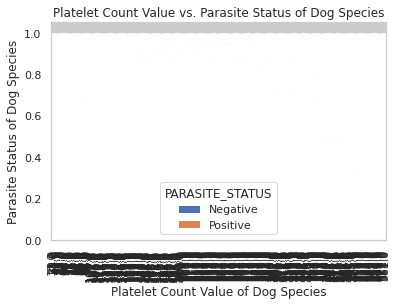

In [282]:
plateletCountValue=pd.crosstab(df['PL.CNT'],df.PARASITE_STATUS)
plateletCountValue.div(plateletCountValue.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Platelet Count Value vs. Parasite Status of Dog Species')
plt.xlabel('Platelet Count Value of Dog Species')
plt.ylabel('Parasite Status of Dog Species')
plt.savefig('platelet_parasite')

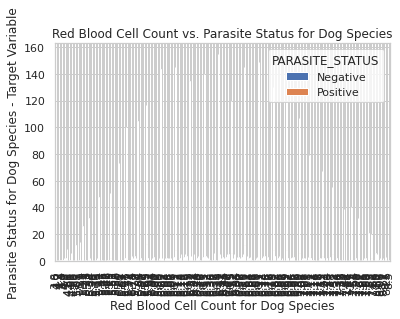

In [181]:
%matplotlib inline 
pd.crosstab(df.RBC, df.PARASITE_STATUS).plot(kind = 'bar')
plt.title('Red Blood Cell Count vs. Parasite Status for Dog Species')
plt.xlabel('Red Blood Cell Count for Dog Species')
plt.ylabel('Parasite Status for Dog Species - Target Variable')
plt.savefig('rbc_parasite')

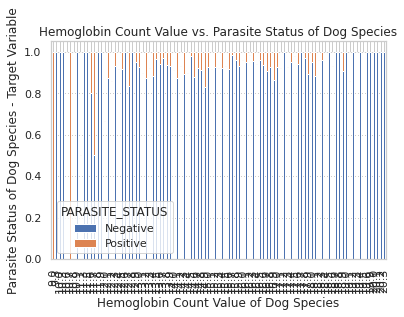

In [182]:
hemoglobinCountValue=pd.crosstab(df.HGB,df.PARASITE_STATUS)
hemoglobinCountValue.div(hemoglobinCountValue.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Hemoglobin Count Value vs. Parasite Status of Dog Species')
plt.xlabel('Hemoglobin Count Value of Dog Species')
plt.ylabel('Parasite Status of Dog Species - Target Variable')
plt.savefig('hemoglobin_parasite')

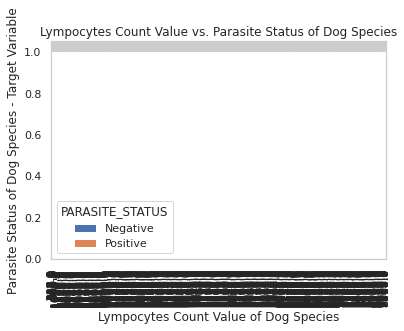

In [183]:
lympocytesValue=pd.crosstab(df['LYMP.CNT'],df.PARASITE_STATUS)
lympocytesValue.div(lympocytesValue.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Lympocytes Count Value vs. Parasite Status of Dog Species')
plt.xlabel('Lympocytes Count Value of Dog Species')
plt.ylabel('Parasite Status of Dog Species - Target Variable')
plt.savefig('lympocytes_parasitestatus')

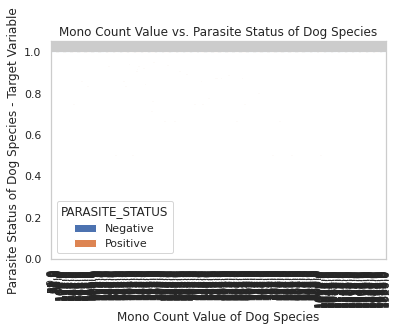

In [184]:
monoCountValue=pd.crosstab(df['MONO.CNT'],df.PARASITE_STATUS)
monoCountValue.div(monoCountValue.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Mono Count Value vs. Parasite Status of Dog Species')
plt.xlabel('Mono Count Value of Dog Species')
plt.ylabel('Parasite Status of Dog Species - Target Variable')
plt.savefig('monoCount_parasiteStatus')

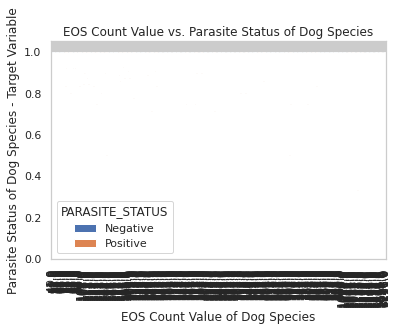

In [185]:
eosCountValue=pd.crosstab(df['EOS.CNT'],df.PARASITE_STATUS)
eosCountValue.div(eosCountValue.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('EOS Count Value vs. Parasite Status of Dog Species')
plt.xlabel('EOS Count Value of Dog Species')
plt.ylabel('Parasite Status of Dog Species - Target Variable')
plt.savefig('eosCount_parasiteStatus')

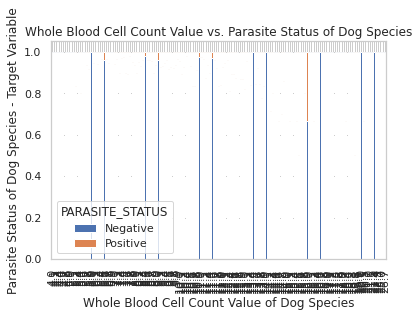

In [186]:
wholeBloodCellValue=pd.crosstab(df['WBC'],df.PARASITE_STATUS)
wholeBloodCellValue.div(wholeBloodCellValue.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Whole Blood Cell Count Value vs. Parasite Status of Dog Species')
plt.xlabel('Whole Blood Cell Count Value of Dog Species')
plt.ylabel('Parasite Status of Dog Species - Target Variable')
plt.savefig('wholebloodcellCount_parasiteStatus')

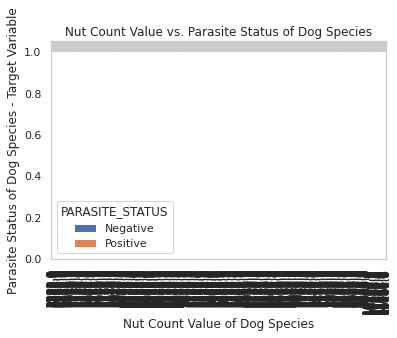

In [187]:
nutCountValue = pd.crosstab(df['NUT.CNT'],df.PARASITE_STATUS)
nutCountValue.div(nutCountValue.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Nut Count Value vs. Parasite Status of Dog Species')
plt.xlabel('Nut Count Value of Dog Species')
plt.ylabel('Parasite Status of Dog Species - Target Variable')
plt.savefig('nutCountValue_parasiteStatus')

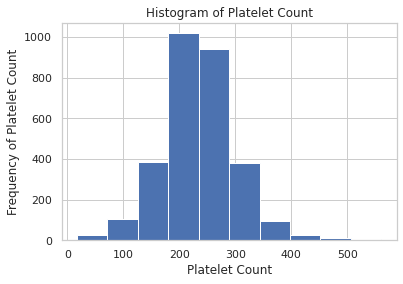

In [188]:
df['PL.CNT'].hist()
plt.title('Histogram of Platelet Count')
plt.xlabel('Platelet Count')
plt.ylabel('Frequency of Platelet Count')
plt.savefig('histogram_plateletCount')

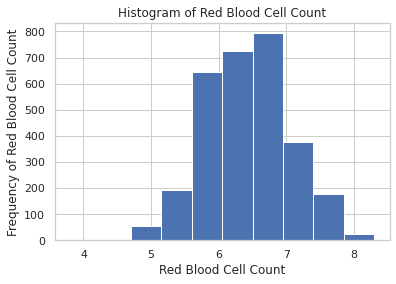

In [189]:
df['RBC'].hist()
plt.title('Histogram of Red Blood Cell Count')
plt.xlabel('Red Blood Cell Count')
plt.ylabel('Frequency of Red Blood Cell Count')
plt.savefig('redbloodcell_frequency')

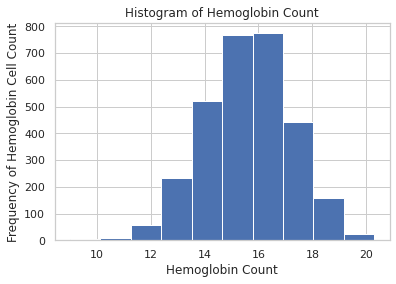

In [190]:
df['HGB'].hist()
plt.title('Histogram of Hemoglobin Count')
plt.xlabel('Hemoglobin Count')
plt.ylabel('Frequency of Hemoglobin Cell Count')
plt.savefig('hemoglobin_frequency')

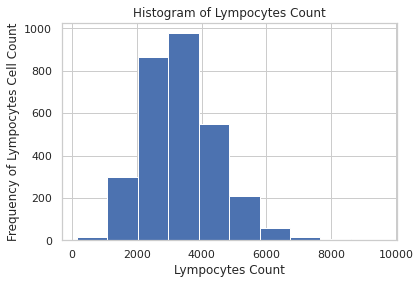

In [191]:
df['LYMP.CNT'].hist()
plt.title('Histogram of Lympocytes Count')
plt.xlabel('Lympocytes Count')
plt.ylabel('Frequency of Lympocytes Cell Count')
plt.savefig('lympocytes_frequency')

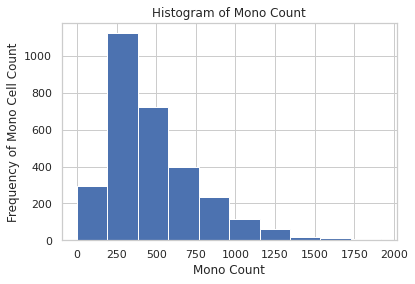

In [192]:
df['MONO.CNT'].hist()
plt.title('Histogram of Mono Count')
plt.xlabel('Mono Count')
plt.ylabel('Frequency of Mono Cell Count')
plt.savefig('mono_frequency')

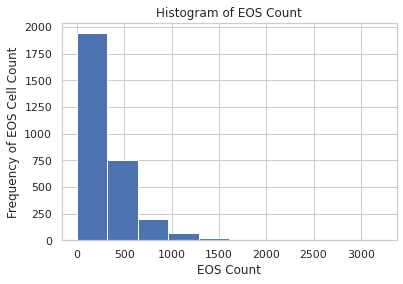

In [193]:
df['EOS.CNT'].hist()
plt.title('Histogram of EOS Count')
plt.xlabel('EOS Count')
plt.ylabel('Frequency of EOS Cell Count')
plt.savefig('eos_frequency')

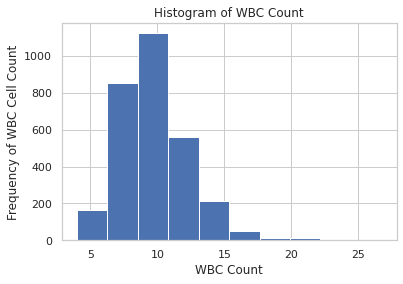

In [194]:
df['WBC'].hist()
plt.title('Histogram of WBC Count')
plt.xlabel('WBC Count')
plt.ylabel('Frequency of WBC Cell Count')
plt.savefig('wbc_frequency')

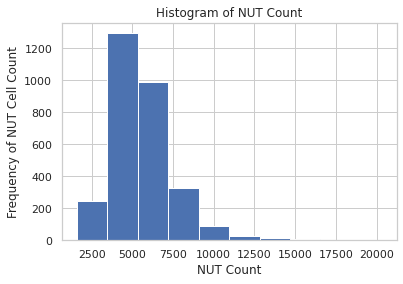

In [199]:
df['NUT.CNT'].hist()
plt.title('Histogram of NUT Count')
plt.xlabel('NUT Count')
plt.ylabel('Frequency of NUT Cell Count')
plt.savefig('nut_frequency')

In [306]:
dogPredictorVariables = ['AGE',	'RBC',	'HGB'	, 'WBC',	'EOS.CNT', 'MONO.CNT',	'NUT.CNT',	'PL.CNT',	'LYMP.CNT']
X = df[dogPredictorVariables]
y = df['PARASITE_STATUS']

In [313]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [314]:
from sklearn.linear_model import LogisticRegression

logisticRegressionDogPredictor = LogisticRegression(random_state = 20)
logisticRegressionDogPredictor.fit(A_train, b_train)
b_pred = logisticRegressionDogPredictor.predict(A_test)

In [315]:
from sklearn import metrics

dogPredictorConfusionMatrix = metrics.confusion_matrix(b_test, b_pred)
dogPredictorConfusionMatrix

array([[551,   0],
       [ 48,   0]])

Text(0.5, 12.5, 'Parasite Status - Predicted')

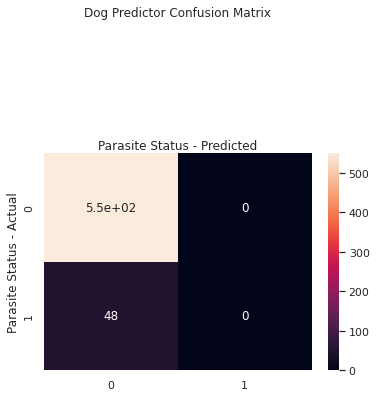

In [316]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dogPredictorClassNames = [0, 1]
dogPredictorFigure, ax = plt.subplots()
dogPredictorTickmarks = np.arange(len(dogPredictorClassNames))
plt.xticks(dogPredictorTickmarks, dogPredictorClassNames)
plt.yticks(dogPredictorTickmarks, dogPredictorClassNames)
sns.heatmap(pd.DataFrame(dogPredictorConfusionMatrix), annot = True)
ax.xaxis.set_label_position("top")
plt.tight_layout
plt.title("Dog Predictor Confusion Matrix", y = 1.6)
plt.ylabel("Parasite Status - Actual")
plt.xlabel("Parasite Status - Predicted")

In [318]:
from sklearn.metrics import classification_report
targetVariableOptions = ['Negative for Parasite Testing', 'Positive for Parasite Testing']
print(classification_report(b_test, b_pred, target_names = targetVariableOptions))

                               precision    recall  f1-score   support

Negative for Parasite Testing       0.92      1.00      0.96       551
Positive for Parasite Testing       0.00      0.00      0.00        48

                     accuracy                           0.92       599
                    macro avg       0.46      0.50      0.48       599
                 weighted avg       0.85      0.92      0.88       599



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
